In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
from mysql.connector import errorcode
from urllib.parse import quote_plus
from sqlalchemy import create_engine

In [3]:
config = {
    'host': 'localhost',
    'user': 'root',
    'password': 'Physic955',
    'database': 'Basketball_Reference'
}

password = quote_plus("Physic955")
engine = create_engine(
    f"mysql+mysqlconnector://{config['user']}:{password}@{config['host']}/{config['database']}"
)

In [6]:
query = """
            SELECT p.Name, COUNT(mjt.TrophyID) AS Trophy_Count, p.PTS
            FROM michael_jordan_trophy mjt
            JOIN players p ON mjt.PlayerID = p.PlayerID
            JOIN player_positions pp ON p.PlayerID = pp.PlayerID
            JOIN positions pos ON pp.PositionID = pos.PositionID
            WHERE pos.PositionName = 'Point Guard'
            GROUP BY p.PlayerID
            ORDER BY Trophy_Count DESC;
        """
pointguards = pd.read_sql(query, engine)
        
print(pointguards)

                       Name  Trophy_Count   PTS
0     Giannis Antetokounmpo             5  23.9
1               Luka Dončić             5  28.6
2             Stephen Curry             3  24.7
3              LeBron James             3  27.0
4                Chris Paul             3  17.0
5             Jalen Brunson             2  18.1
6   Shai Gilgeous-Alexander             2  24.4
7                 Ja Morant             2  22.6
8            Damian Lillard             2  25.1
9              James Harden             2  24.1
10        Russell Westbrook             1  21.2
11            Derrick White             1  13.0
12         Donovan Mitchell             1  24.7
13             De'Aaron Fox             1  21.5
14             Devin Booker             1  24.4


In [8]:
top3_pointguards = pointguards.head(3)
print(top3_pointguards)

                    Name  Trophy_Count   PTS
0  Giannis Antetokounmpo             5  23.9
1            Luka Dončić             5  28.6
2          Stephen Curry             3  24.7


C:\Users\Asus\AppData\Local\Temp\ipykernel_5304\801425336.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


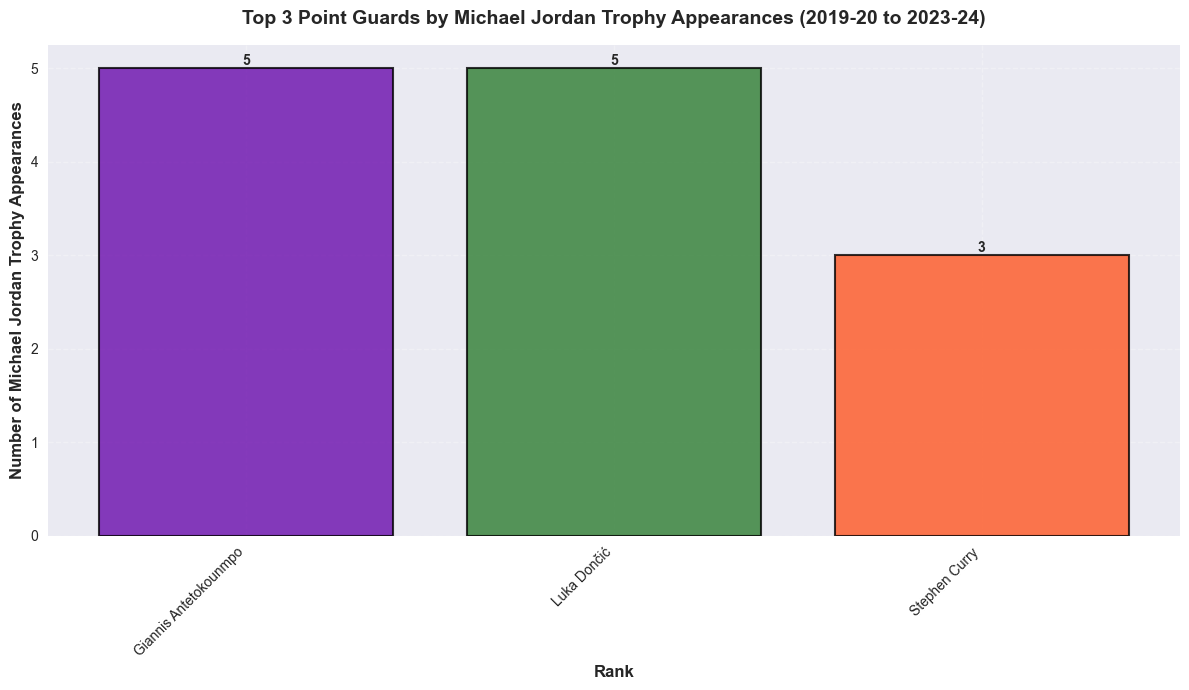

In [14]:
plt.figure(figsize=(12, 7))
plt.style.use('seaborn')
bars = plt.bar(range(len(top3_pointguards)), top3_pointguards['Trophy_Count'],
                color=['#6A0DAD', '#2E7D32', '#FF5722'], alpha=0.8, edgecolor='black', linewidth=1.5)
plt.xlabel('Rank', fontsize=12, fontweight='bold')
plt.ylabel('Number of Michael Jordan Trophy Appearances', fontsize=12, fontweight='bold')
plt.title('Top 3 Point Guards by Michael Jordan Trophy Appearances (2019-20 to 2023-24)', 
            fontsize=14, fontweight='bold', pad=15)
plt.xticks(range(len(top3_pointguards)), top3_pointguards['Name'].apply(lambda x: x.title()), 
            rotation=45, ha='right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.tight_layout()
plt.savefig('point_guard_recommendations.png', dpi=300)
plt.show()
